In [18]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model,metrics
import numpy as np
import seaborn as sns

In [4]:
from google.colab import files


uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [5]:
data = pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


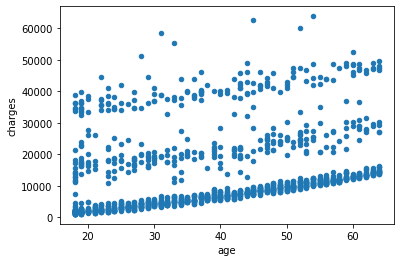

In [6]:
data.plot(kind='scatter',x='age',y='charges')
plt.show()

In [7]:
data.corr() #Corelation Coefficient

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [8]:
ages = pd.DataFrame(data['age'])
charge = pd.DataFrame(data['charges'])

In [9]:
ages

,age
0,19
1,18
2,28
3,33
4,32
...,...
1333,50
1334,18
1335,18
1336,21


In [10]:
charge

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520
...,...
1333,10600.54830
1334,2205.98080
1335,1629.83350
1336,2007.94500


In [11]:
lm = linear_model.LinearRegression()
model = lm.fit(ages,charge)      #prepare the model

In [12]:
model.coef_

array([[257.72261867]])

In [13]:
model.intercept_

array([3165.88500606])

In [14]:
model.score(ages,charge) #Evaluate the model

0.08940589967885804

In [15]:
ages_new = np.array([97])
ages_new = ages_new.reshape(-1,1)
charge_predict = model.predict(ages_new)
charge_predict

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


array([[28164.97901675]])

In [16]:
#predict new values 
X = ([67,78,97])
X = pd.DataFrame(X)
Y = model.predict(X)
Y = pd.DataFrame(Y)
df=pd.concat([X,Y], axis=1, keys =['charge', 'charge_Predicted'])
df

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


,charge,charge_Predicted
,0,0
0,67,20433.300457
1,78,23268.249262
2,97,28164.979017


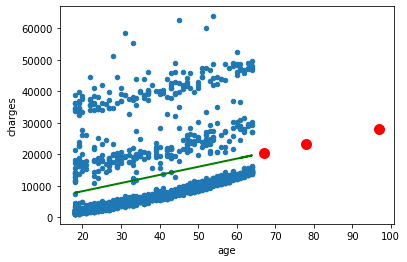

In [17]:
#
data.plot(kind='scatter',x='age',y='charges')
#
plt.plot(ages,model.predict(ages),color = 'green',linewidth=2)
plt.scatter(ages_new, charge_predict, color ='black')
plt.scatter(X, Y, color ='red',linewidth= 5)
plt.show()